# Projeto 1 - Ciência dos Dados

Nome: Pedro Dinacci Célia

## Por que existe paises que nunca foram membros do Conselho de Segurança das Nações Unidas?

## Hipótese e mecanismo:

O Conselho de Segurança das Nações Unidas (CSNU) teve sua primeira sessão em Londres em 1946, atualmente a maioria das sessões são feitas em Nova Iorque. Essa organização das Nações Unidas é notável por dois aspectos de funcionamento: o caratér manadatório nas resoluções e o P5, que são 5 membros permanentes Estados Unidos, Reino Unido, França, Rússia e China.

O conselho é composto por 15 membros, como já visto anteriormente 5 desses membro são permanentes, os outros 10 são eleitos de dois em dois anos ou anualmente, contudo existe paises que nunca tiveram a chance de representar o seu país na organização.

O objetivo desse trabalho é tentar compreender o motivo por qual existe paises que nunca foram membros do CSNU, as hipoteses levantadas são: falta de relevancia mundial e/ou a existencia de inumeros problemas internos o que prejudicariam as ações do conselho.

Para fazer isso seram análisadas as variáves de gasto militar para indicar se um país pode ser visto com um que possui muitos problemas internos. Ademais também será usado o PIB para averiguar na constação econômica dos países. 

Um artigo feito pela Ethics and International Affairs ele descreve e opina sobre vários aspectos do CSNU, outrossim disserta sobre a falta de importância, para a comunidade internacional, dos mebros rotativos. Logo, complementando a hipotese: se os membros rotativos são considerados por alguns como sem importância, imagine aqueles que nunca foram membros.

ETHICS AND INTERNATIONAL AFFAIRS. Elected Security Council Members: Power, Process, Purpose. Disponível em: https://www.ethicsandinternationalaffairs.org/2012/elected-security-council-members-power-process-purpose/. Acesso em: 27 ago. 2019.

## Bases de dados usadas

https://docs.google.com/spreadsheets/d/1HXH3ncdQLFpOXVNdC2nkPCSGz_perkfPcBeU1e2HF24/pub - Gasto militar em % do PIB

https://docs.google.com/spreadsheets/d/1ERXxEh-2Gejk5mAfqoZMkllRYu6lvEOXZKKDpuxBBlg/pub - PIB

## Análise de dados

Insira abaixo uma análise de dados tratada para ter maior clareza. 

Lembre-se de que, além deste arquivo principal, você precisa entregar um ou mais *notebooks* mais brutos com todas as tentativas que fez e que não deram certo .

**Não inclua dados ou gráficos sem motivação nem interpretação** - sempre que fizer uma análise, plot ou tablea, diga qual sua intenção. Logo após a apresentação diga qual conclusão específica ou interpretação você tira daquela análise

In [7]:
#Importando todas as classes necessárias.

%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt


In [8]:
#Leitura dos arquivos em Excel.

PIB = pd.read_excel('indicatorGNItotalPPP.xlsx')
GDP_cap = pd.read_excel('indicator WB data GDP pc ppp.xlsx')
Mil_exp = pd.read_excel('military expenditure.xlsx')
Energy_total = pd.read_excel('Electricity Generation.xlsx')



In [9]:
#Mundando o index de cada tabela.

PIB_index = PIB.set_index('Total GNI, PPP (current international $)')
GDP_cap_index = GDP_cap.set_index('GDP per capity, 2005 ppp, WB data')
Mil_exp_index = Mil_exp.set_index('Military expenditure (% of GDP)')

In [11]:
#Transpondo os dados e defindo os anos a serem analisados.

PIB_trans=PIB_index.transpose()
PIB_idx=PIB_trans[PIB_trans.index>'2000']
PIB_x=PIB_idx.transpose()

In [46]:
#Transpondo os dados e defindo os anos a serem analisados.

GDP_cap_trans = GDP_cap_index.transpose()
GDP_cap_idx = GDP_cap_trans[GDP_cap_trans.index>2000]
GDP_cap_x = GDP_cap_idx.transpose()

In [15]:
#Transpondo os dados e defindo os anos a serem analisados.

Mil_exp_trans = Mil_exp_index.transpose()
Mil_exp_idx = Mil_exp_trans[Mil_exp_trans.index>'2000']
Mil_exp_x = Mil_exp_idx.transpose()

In [16]:
#Fazendo a seleção dos paises a serem trabalhados.

PIB_select = PIB_x.loc[['China','United States','Russia','United Kingdom','France','Israel','Belize','Mongolia','Switzerland','Afghanistan','Mozambique'],:]
GDP_cap_select = GDP_cap_x.loc[['China','United States','Russia','United Kingdom','France','Israel','Belize','Mongolia','Switzerland','Afghanistan','Mozambique'],:]
Mil_exp_select = Mil_exp_x.loc[['China','United States','Russia','United Kingdom','France','Israel','Belize','Mongolia','Switzerland','Afghanistan','Mozambique'],:]

In [34]:
#Fazendo uma seleção de cada ano.
PIB_2001 = PIB_select.loc[:,'2001']
PIB_2002 = PIB_select.loc[:,'2002']
PIB_2003 = PIB_select.loc[:,'2003']
PIB_2004 = PIB_select.loc[:,'2004']
PIB_2005 = PIB_select.loc[:,'2005']
PIB_2006 = PIB_select.loc[:,'2006']
PIB_2007 = PIB_select.loc[:,'2007']
PIB_2008 = PIB_select.loc[:,'2008']
PIB_2009 = PIB_select.loc[:,'2009']
PIB_2010 = PIB_select.loc[:,'2010']
PIB_2011 = PIB_select.loc[:,'2011']

In [29]:
#Fazendo uma seleção de cada ano.
GDP_cap_2001 = GDP_cap_select.loc[:,2001]
GDP_cap_2002 = GDP_cap_select.loc[:,2002]
GDP_cap_2003 = GDP_cap_select.loc[:,2003]
GDP_cap_2004 = GDP_cap_select.loc[:,2004]
GDP_cap_2005 = GDP_cap_select.loc[:,2005]
GDP_cap_2006 = GDP_cap_select.loc[:,2006]
GDP_cap_2007 = GDP_cap_select.loc[:,2007]
GDP_cap_2008 = GDP_cap_select.loc[:,2008]
GDP_cap_2009 = GDP_cap_select.loc[:,2009]
GDP_cap_2010 = GDP_cap_select.loc[:,2010]
GDP_cap_2011 = GDP_cap_select.loc[:,2011]

In [30]:
#Fazendo uma seleção de cada ano.
Mil_exp_2001 = Mil_exp_select.loc[:,'2001']
Mil_exp_2002 = Mil_exp_select.loc[:,'2002']
Mil_exp_2003 = Mil_exp_select.loc[:,'2003']
Mil_exp_2004 = Mil_exp_select.loc[:,'2004']
Mil_exp_2005 = Mil_exp_select.loc[:,'2005']
Mil_exp_2006 = Mil_exp_select.loc[:,'2006']
Mil_exp_2007 = Mil_exp_select.loc[:,'2007']
Mil_exp_2008 = Mil_exp_select.loc[:,'2008']
Mil_exp_2009 = Mil_exp_select.loc[:,'2009']
Mil_exp_2010 = Mil_exp_select.loc[:,'2010']
Mil_exp_2011 = Mil_exp_select.loc[:,'2011']

In [45]:
df = GDP_cap_2001.join(Mil_exp_2001, how=inner, rsuffix='_GDP_cap', lsuffix='_Mil_exp')
df.head(5)

AttributeError: 'Series' object has no attribute 'join'

Text(0.5, 1.0, 'PIB dos paises selecionados de 2001 a 2011')

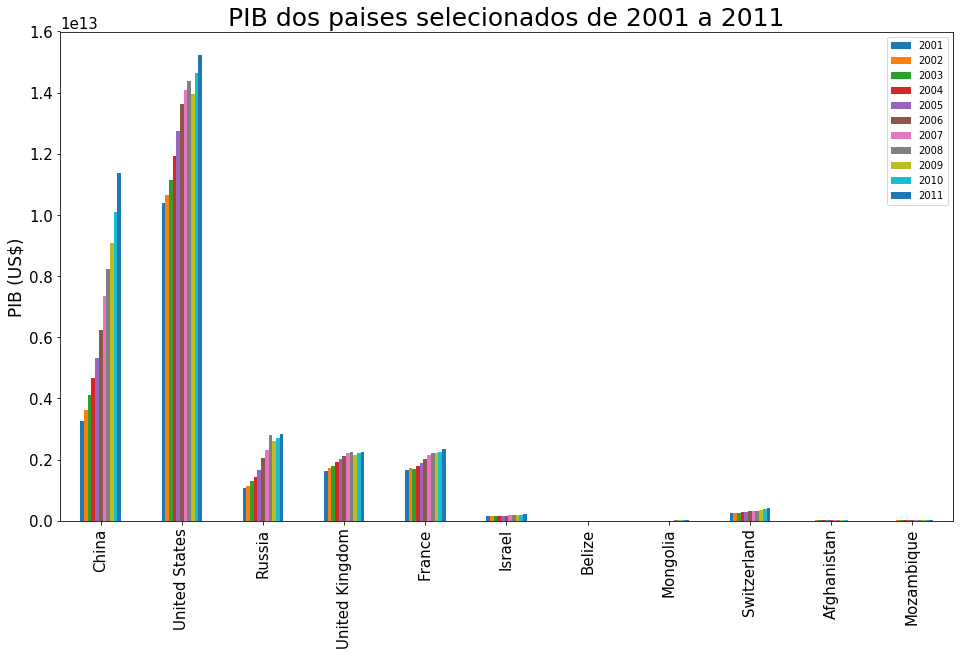

In [20]:
#Plotando o gráfico do PIB dos paises selecionados.
#Objetivo: Averigar a riqueza de cada pais.

plt.rcParams["figure.figsize"] = [16,9]
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["axes.labelsize"] = 17
plt.rcParams["lines.markersize"] = 15
PIB_select.plot.bar()
plt.ylabel('PIB (US$)')
plt.xlabel('')
plt.title('PIB dos paises selecionados de 2001 a 2011')

Text(0.5, 1.0, 'PIB per capita dos paises selecionados de 2001 a 2011')

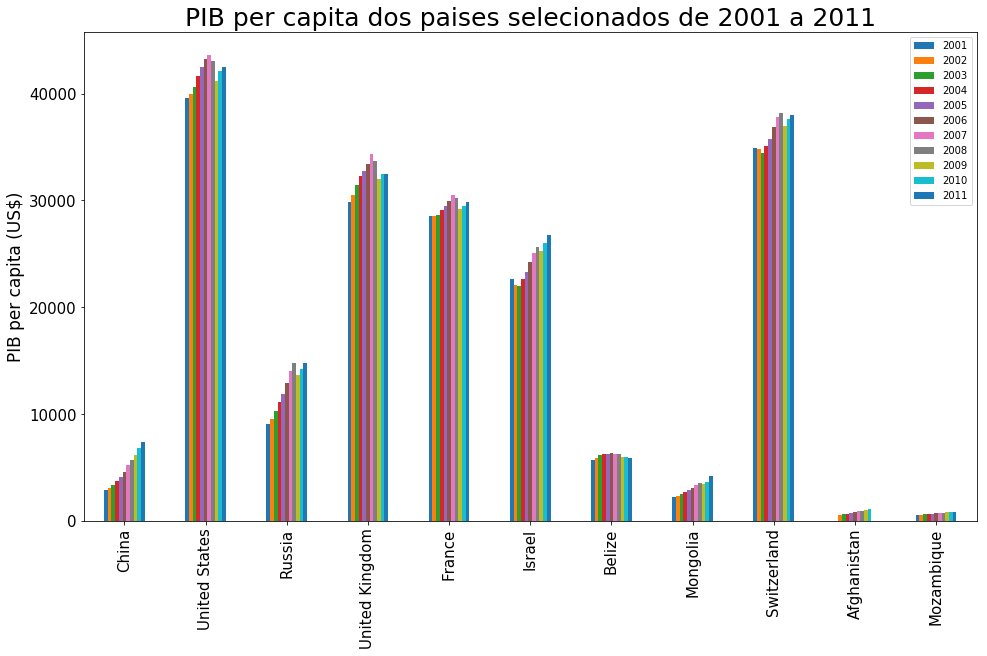

In [47]:
#Plotando o gráfico do PIB per capita dos paises selecionados.
#Objetivo: Obter o poder economico da população de cada país.


GDP_cap_select.plot.bar()
plt.ylabel('PIB per capita (US$)')
plt.xlabel('')
plt.title('PIB per capita dos paises selecionados de 2001 a 2011')

No gráfico do PIB per capita é possível ver alguns grupos, por exemplo: EUA, Reino Unido, Suiça, França e Israel estão no grupo do mais ricos; Já China, Russia, Belize, Mongolia, Afeganistão e Moçambique estão nos pobres. 

Vale ressaltar que mesmo com dois grupos os membros do P5 se destacam como os mais ricos, em seus respectivos grupos, contudo a Suiça comprova o inverso sendo o segundo país mais rico dentro do grupo dos ricos.

Text(0.5, 1.0, 'Gasto miliatar dos paises selecionados de 2001 a 2011')

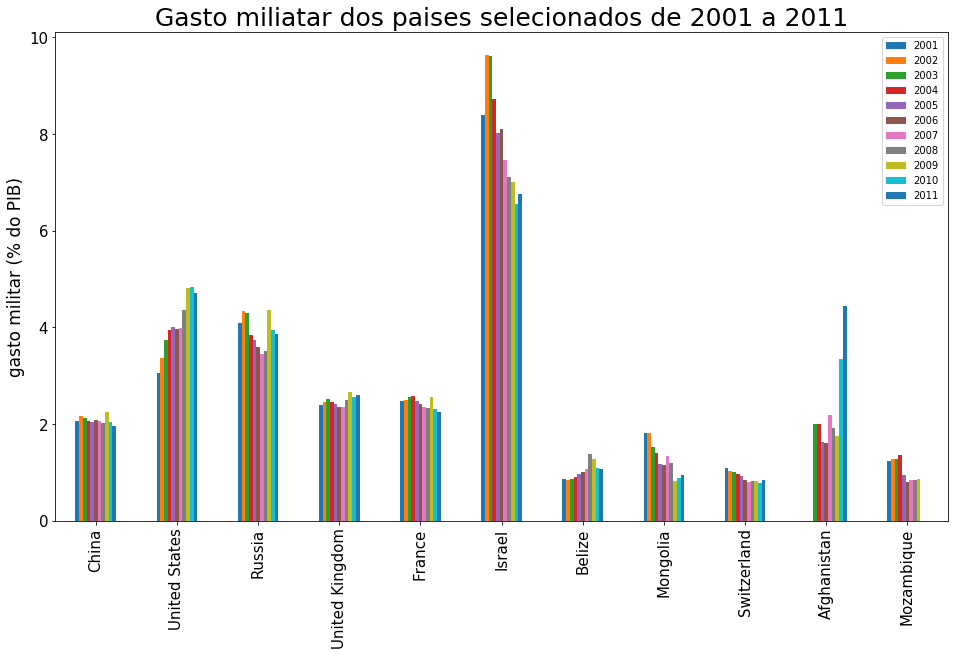

In [22]:
#Plotando o gráfico do gasto militar em relação de % do PIB, dos paises selecionados.
#Objetivo: Descobrir quão grande o foco militar é no país.

plt.rcParams["figure.figsize"] = [16,9]
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["axes.labelsize"] = 17
plt.rcParams["lines.markersize"] = 15
Mil_exp_select.plot.bar()
plt.ylabel('gasto militar (% do PIB)')
plt.xlabel('')
plt.title('Gasto miliatar dos paises selecionados de 2001 a 2011')

Na questão militarista, Israel tem o maior gasto percentual e o Afeganistão tem o terceiro maior gasto percentual, todos os outros paises que não nunca foram do CSNU não estão perto de chegar no nível de gasto militar do P5.

Contudo vale destacar que isso é um dado em termos percentuais de PIB, ou seja, Israel gasta mais em termos percentuais, não significa que em termos quantitativos ele gaste mais do que os EUA, por exemplo.

## Conclusão

Responda à pergunta, argumento da melhor forma possível com base nos dados